In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression

In [2]:
# Load the dataset
df = pd.read_csv('powerconsumption.csv')


In [3]:
# Convert the 'datetime' column to a datetime object
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [4]:
# Extract the date and time features
df['day'] = df['Datetime'].dt.day
df['month'] = df['Datetime'].dt.month
df['hour'] = df['Datetime'].dt.hour

In [5]:
# Normalize the data using Min-Max Scaler
scaler = MinMaxScaler()
df[['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows','DiffuseFlows','PowerConsumption_Zone1','PowerConsumption_Zone2','PowerConsumption_Zone3']] = scaler.fit_transform(df[['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows','DiffuseFlows','PowerConsumption_Zone1','PowerConsumption_Zone2','PowerConsumption_Zone3']])

In [6]:
# Split the data into training and testing sets
train_size = int(0.8 * len(df))
train_data, test_data = df[0:train_size], df[train_size:]

In [7]:
# Drop the original Datetime column
df.drop('Datetime', axis=1, inplace=True)

In [8]:
# Define the feature and target variables
X = df.drop(['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3'], axis=1)
y = df[['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']]


In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Create a Linear Regression model
lr_model = LinearRegression()

In [11]:
# Train the model
lr_model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Make predictions on the test set
y_pred = lr_model.predict(X_test)

In [13]:
# Evaluate the model using Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')

Mean Squared Error (MSE): 0.01


In [14]:
# Evaluate the model using Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.2f}')

Mean Absolute Error (MAE): 0.09


In [15]:
# Evaluate the model using R-Squared (R2)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R-Squared (R2): {r2:.2f}')

R-Squared (R2): 0.61


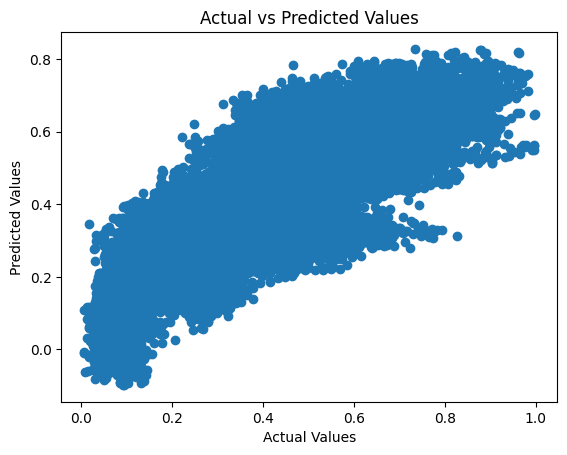

In [16]:
# Plot the predicted values against the actual values
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [17]:
df.sample(5)

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,day,month,hour
16022,0.304464,0.935298,0.003886,0.000163,0.000178,0.210377,0.111192,0.132371,22,4,6
28133,0.637679,0.766355,0.755635,0.467410,0.497857,0.452664,0.457011,0.420673,15,7,8
28236,0.608846,0.886173,0.756101,0.000069,0.000130,0.475976,0.423708,0.519735,16,7,2
32555,0.497593,0.522286,0.754702,0.000072,0.000079,0.426772,0.438041,0.390326,15,8,1
9891,0.495145,0.376827,0.003886,0.410402,0.556832,0.453680,0.391137,0.217388,10,3,16


In [18]:
df.shape

(52416, 11)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature             52416 non-null  float64
 1   Humidity                52416 non-null  float64
 2   WindSpeed               52416 non-null  float64
 3   GeneralDiffuseFlows     52416 non-null  float64
 4   DiffuseFlows            52416 non-null  float64
 5   PowerConsumption_Zone1  52416 non-null  float64
 6   PowerConsumption_Zone2  52416 non-null  float64
 7   PowerConsumption_Zone3  52416 non-null  float64
 8   day                     52416 non-null  int32  
 9   month                   52416 non-null  int32  
 10  hour                    52416 non-null  int32  
dtypes: float64(8), int32(3)
memory usage: 3.8 MB


In [20]:
df.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,day,month,hour
0,0.090091,0.748382,0.005130,0.000040,0.000115,0.526251,0.262361,0.343368,1,1,0
1,0.086146,0.756770,0.005130,0.000057,0.000079,0.415545,0.374886,0.340731,1,1,0
2,0.083399,0.756770,0.004663,0.000050,0.000095,0.397623,0.362116,0.329626,1,1,0
3,0.078176,0.762761,0.005130,0.000075,0.000091,0.374149,0.339738,0.311165,1,1,0
4,0.072736,0.771148,0.004819,0.000038,0.000079,0.350834,0.322796,0.300199,1,1,0


In [21]:
# Forecast electricity consumption for the next week
next_week_data = pd.DataFrame({
    'year': [2022, 2022, 2022, 2022, 2022, 2022, 2022],  # replace with your data
    'month': [1, 1, 1, 1, 1, 1, 1],  # replace with your data
    'day': [8, 9, 10, 11, 12, 13, 14],  # replace with your data
    'hour': [0, 0, 0, 0, 0, 0, 0],  # replace with your data
    'minute': [0, 0, 0, 0, 0, 0, 0],  # replace with your data
    'second': [0, 0, 0, 0, 0, 0, 0],  # replace with your data
    'Temperature': [20, 20, 20, 20, 20, 20, 20],  # replace with your data
    'Humidity': [60, 60, 60, 60, 60, 60, 60],  # replace with your data
    'WindSpeed': [5, 5, 5, 5, 5, 5, 5],  # replace with your data
    'GeneralDiffuseFlows': [10, 10, 10, 10, 10, 10, 10],  # replace with your data
    'DiffuseFlows': [5, 5, 5, 5, 5, 5, 5]  # replace with your data
})

In [22]:
next_week_data = next_week_data.reindex(columns=X.columns)

In [23]:
next_week_forecast = lr_model.predict(next_week_data)

In [24]:
next_week_forecast_df = pd.DataFrame(next_week_forecast, columns=['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3'])
print("Next Week Forecast:")
print(next_week_forecast_df)

Next Week Forecast:
   PowerConsumption_Zone1  PowerConsumption_Zone2  PowerConsumption_Zone3
0                9.111270               -1.201948               11.888983
1                9.111650               -1.201057               11.888541
2                9.112030               -1.200165               11.888100
3                9.112410               -1.199274               11.887658
4                9.112790               -1.198383               11.887217
5                9.113169               -1.197492               11.886775
6                9.113549               -1.196601               11.886334
